In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
name = 'GOOG'  #종목명 -구글

start_day = '2021-01-01'
end_day = '2024-08-01'

In [4]:
stock = yf.download(name, start=start_day, end=end_day)

C:\Users\Celeste\AppData\Local\Temp\ipykernel_11632\3346645531.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(name, start=start_day, end=end_day)
[*********************100%***********************]  1 of 1 completed


In [5]:
print(stock.shape)  #작업 확인용 출력
stock.head() #작업 확인용 출력

(899, 5)


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2021-01-04,85.824684,87.434169,84.812113,87.279723,38038000
2021-01-05,86.454376,86.789584,85.316912,85.663789,22906000
2021-01-06,86.174774,86.805953,84.372601,84.552870,52042000
2021-01-07,88.755127,88.812231,86.262185,86.411659,45300000
2021-01-08,89.746338,89.876944,88.074036,88.791378,41012000


In [6]:
stock2 = pd.DataFrame(stock['Close'])

stock2.head() #작업 확인용 출력

Ticker,GOOG
Date,
2021-01-04,85.824684
2021-01-05,86.454376
2021-01-06,86.174774
2021-01-07,88.755127
2021-01-08,89.746338


In [8]:
# 다운로드한 주가 데이터를 파일 저장
stock2.to_csv('../14장_data/'+name+'.csv') 

In [9]:
stock2.reset_index()
stock_values = stock2.values

print(stock_values[0]) #작업 확인용 출력

[85.82468414]


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
stock_values_scaled=scaler.fit_transform(stock_values)

stock_values_scaled[0] #작업 확인용 출력

array([0.026712])

In [12]:
n_train = int(len(stock_values)*0.8)  #학습용 데이터 갯수
n_test = len(stock_values) - n_train  #평가용 데이터 갯수

print(n_train, n_test) #작업 확인용 출력

719 180


In [13]:
X_train,Y_train=[],[]

#20일 구간의 주가를 x 값으로하고, 그 다음날 값을 y 값으로 정리하기
for i in range(20, n_train):
  X_train.append(stock_values_scaled[i-20:i,0])
  Y_train.append(stock_values_scaled[i,0])
   
X_train[0] #작업 확인용 출력

array([0.026712  , 0.03250783, 0.02993431, 0.05368445, 0.06280778,
       0.04430046, 0.03508121, 0.0386693 , 0.03216956, 0.03034581,
       0.05533448, 0.09923277, 0.10122112, 0.10570049, 0.10494636,
       0.11310069, 0.07358577, 0.08835879, 0.07584841, 0.10583763])

In [14]:
X_train1, Y_train1 = np.array(X_train), np.array(Y_train)
X_train2 = np.reshape(X_train1, (X_train1.shape[0],X_train1.shape[1],1))

print(X_train2.shape) #작업 확인용 출력 
X_train2[0] #작업 확인용 출력

(699, 20, 1)


array([[0.026712  ],
       [0.03250783],
       [0.02993431],
       [0.05368445],
       [0.06280778],
       [0.04430046],
       [0.03508121],
       [0.0386693 ],
       [0.03216956],
       [0.03034581],
       [0.05533448],
       [0.09923277],
       [0.10122112],
       [0.10570049],
       [0.10494636],
       [0.11310069],
       [0.07358577],
       [0.08835879],
       [0.07584841],
       [0.10583763]])

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:
lstm_stock = Sequential()

lstm_stock.add(LSTM(units=20, return_sequences=True, input_shape=(X_train2.shape[1],1)))
lstm_stock.add(LSTM(units=20, return_sequences=False))
lstm_stock.add(Dense(1))

C:\Users\Celeste\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
stock_test = stock_values_scaled[n_train-20:]
X_test = []

for i in range(20, len(stock_test)):
  X_test.append(stock_test[i-20:i,0])


X_test[0] #작업 확인용 출력

array([0.50361454, 0.52107498, 0.52564577, 0.51001351, 0.50727089,
       0.48679382, 0.49739786, 0.51769249, 0.39473711, 0.36520953,
       0.36484388, 0.38632675, 0.38221311, 0.4029646 , 0.41219776,
       0.42856112, 0.43843428, 0.44711872, 0.45498071, 0.44062846])

In [19]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

print(X_test.shape)  #작업 확인용 출력
print(X_test[0])

(180, 20, 1)
[[0.50361454]
 [0.52107498]
 [0.52564577]
 [0.51001351]
 [0.50727089]
 [0.48679382]
 [0.49739786]
 [0.51769249]
 [0.39473711]
 [0.36520953]
 [0.36484388]
 [0.38632675]
 [0.38221311]
 [0.4029646 ]
 [0.41219776]
 [0.42856112]
 [0.43843428]
 [0.44711872]
 [0.45498071]
 [0.44062846]]


In [20]:
predicted_value = lstm_stock.predict(X_test)

predicted_value[0] #작업 확인용 출력

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


array([0.00116647], dtype=float32)

In [21]:
predicted_value = scaler.inverse_transform(predicted_value)

predicted_value[0] #작업 확인용 출력

array([83.04927], dtype=float32)

In [22]:
stock_train_vis = stock[:n_train]
stock_test_vis = stock[n_train:]
stock_test_vis['Predictions'] = predicted_value

C:\Users\Celeste\AppData\Local\Temp\ipykernel_11632\2531245371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_test_vis['Predictions'] = predicted_value


In [23]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'GOOG (2021-01-01 ~ 2024-08-01 )')

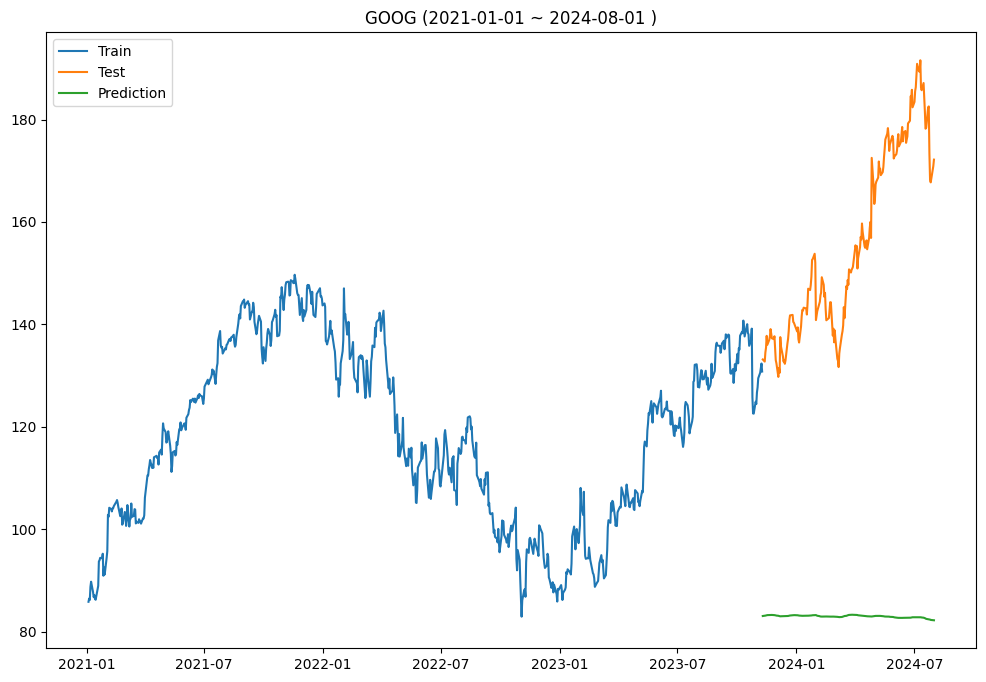

In [24]:
plt.figure(figsize = (12,8))
plt.plot(stock_train_vis['Close'], label = 'Train')
plt.plot(stock_test_vis['Close'], label = 'Test')
plt.plot(stock_test_vis['Predictions'], label = 'Prediction')
plt.legend()
plt.title(name + ' (' + start_day + ' ~ ' + end_day + ' )')